In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# Find Shape of Our Dataset (Number of Rows And Number of Columns)
data.shape

(1025, 14)

In [4]:
# Get Information About Our Dataset Like Total Number Rows, Total Number of Columns, Datatypes of Each Column 
# And Memory Requirement
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
# Check Null Values In The Dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
# Check For Duplicate Data and Drop Them
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
15,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
31,50,0,1,120,244,0,1,162,0,1.1,2,0,2,1
43,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
55,55,1,0,140,217,0,1,111,1,5.6,0,0,3,0
61,66,0,2,146,278,0,0,152,0,0.0,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [7]:
data.drop_duplicates(inplace=True)

In [8]:
data[data.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target


In [9]:
data.shape

(302, 14)

In [10]:
# Get Overall Statistics About The Dataset
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [11]:
# Draw Correlation Matrix 
data.corr().round(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.09,-0.06,0.28,0.21,0.12,-0.11,-0.40,0.09,0.21,-0.16,0.30,0.07,-0.22
sex,-0.09,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.05,0.14,0.10,-0.03,0.11,0.21,-0.28
cp,-0.06,-0.05,1.00,0.05,-0.07,0.10,0.04,0.29,-0.39,-0.15,0.12,-0.20,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.13,0.18,-0.12,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.15
chol,0.21,-0.20,-0.07,0.13,1.00,0.01,-0.15,-0.01,0.06,0.05,0.00,0.09,0.10,-0.08
fbs,0.12,0.05,0.10,0.18,0.01,1.00,-0.08,-0.01,0.02,0.00,-0.06,0.14,-0.03,-0.03
restecg,-0.11,-0.06,0.04,-0.12,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.08,-0.01,0.13
thalach,-0.40,-0.05,0.29,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.38,-0.23,-0.09,0.42
exang,0.09,0.14,-0.39,0.07,0.06,0.02,-0.07,-0.38,1.00,0.29,-0.26,0.13,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.00,-0.06,-0.34,0.29,1.00,-0.58,0.24,0.21,-0.43


<AxesSubplot:>

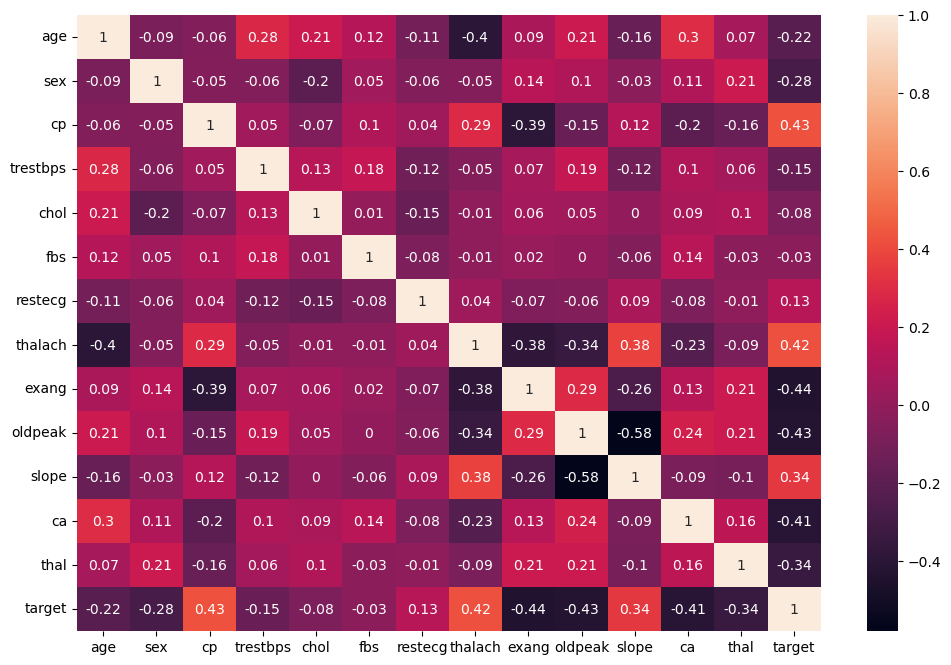

In [12]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr().round(2),annot=True)

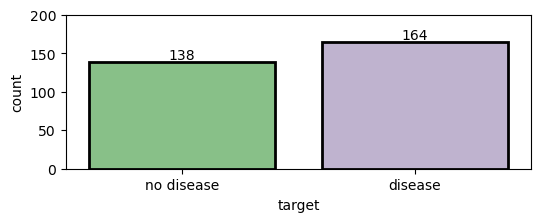

In [13]:
# How Many People Have Heart Disease, And How Many Don't Have Heart Disease In This Dataset?
fig,ax = plt.subplots(figsize=(6,2))
sns.countplot(x='target',data=data,ax=ax,palette='Accent',ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.xticks(ticks=[0,1],labels=['no disease','disease'])
plt.ylim(0,200)
plt.show()

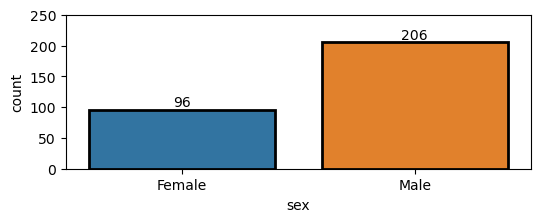

In [14]:
# Find Count of  Male & Female in this Dataset
fig,ax = plt.subplots(figsize=(6,2))
sns.countplot(x='sex',data=data,ax=ax,ec='k',lw=2)
ax.bar_label(ax.containers[0])
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.ylim(0,250)
plt.show()

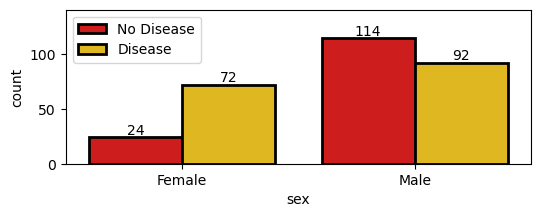

In [15]:
# Find Gender Distribution According to The Target Variable
fig,ax = plt.subplots(figsize=(6,2))
sns.countplot(x='sex',hue='target',data=data,ax=ax,palette='hot',ec='k',lw=2)
for i in ax.containers:
    ax.bar_label(i)
plt.xticks(ticks=[0,1],labels=['Female','Male'])
plt.ylim(0,140)
plt.legend(labels=['No Disease','Disease'])
plt.show()

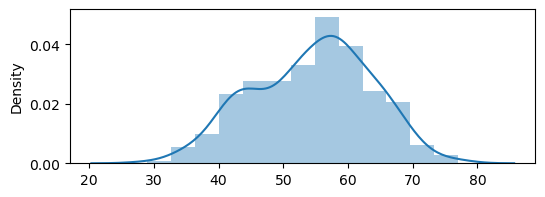

In [16]:
# Check Age Distribution In The Dataset
fig,ax = plt.subplots(figsize=(6,2))
sns.distplot(x=data['age'])
plt.show()

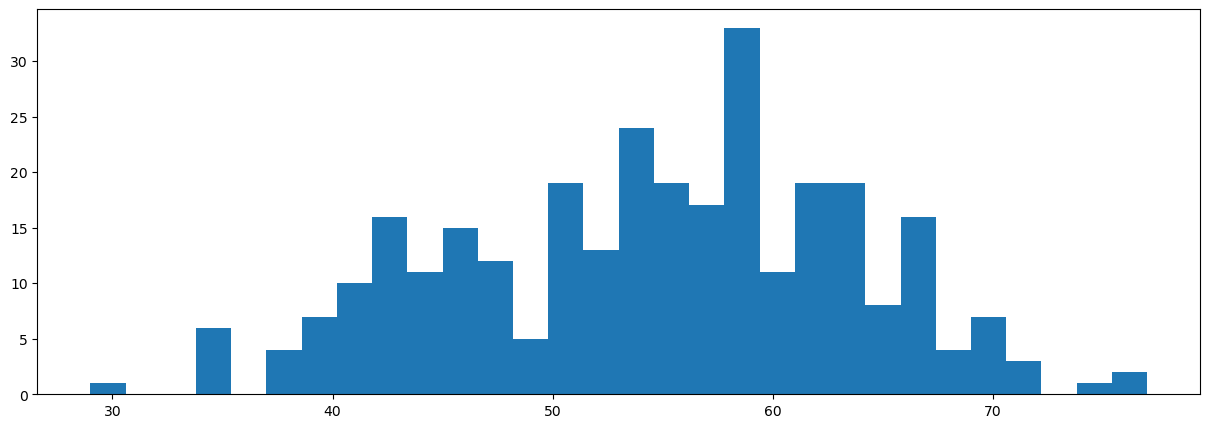

In [17]:
# Age distribution
plt.figure(figsize=(15,5))
plt.hist(data['age'],bins=30)
plt.show()

In [18]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [19]:
# Data Preprocessing
data['target'] = data['target'].replace(to_replace=[0,1],value=['Disease','No Disease'])
data['sex'] = data['sex'].replace(to_replace=[0,1],value=['Female','Male'])
data['fbs'] = data['fbs'].replace(to_replace=[0,1],value=['False','True'])
data['exang'] = data['exang'].replace(to_replace=[0,1],value=['No','Yes'])
data['thal'] = data['thal'].replace(to_replace=[0,1,2,3],value=['Normal','Fixed Defect','Reversable Defect',\
                                                                'Irreversable Defect'])

In [20]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,Male,0,125,212,False,1,168,No,1.0,2,2,Irreversable Defect,Disease
1,53,Male,0,140,203,True,0,155,Yes,3.1,0,0,Irreversable Defect,Disease
2,70,Male,0,145,174,False,1,125,Yes,2.6,0,0,Irreversable Defect,Disease
3,61,Male,0,148,203,False,1,161,No,0.0,2,1,Irreversable Defect,Disease
4,62,Female,0,138,294,True,1,106,No,1.9,1,3,Reversable Defect,Disease


In [21]:
# Hot one encoding categorical data
data = pd.get_dummies(data=data,columns=['sex','fbs','exang','thal'])
data.head()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,target,sex_Female,sex_Male,fbs_False,fbs_True,exang_No,exang_Yes,thal_Fixed Defect,thal_Irreversable Defect,thal_Normal,thal_Reversable Defect
0,52,0,125,212,1,168,1.0,2,2,Disease,0,1,1,0,1,0,0,1,0,0
1,53,0,140,203,0,155,3.1,0,0,Disease,0,1,0,1,0,1,0,1,0,0
2,70,0,145,174,1,125,2.6,0,0,Disease,0,1,1,0,0,1,0,1,0,0
3,61,0,148,203,1,161,0.0,2,1,Disease,0,1,1,0,1,0,0,1,0,0
4,62,0,138,294,1,106,1.9,1,3,Disease,1,0,0,1,1,0,0,0,0,1


In [22]:
# Separating features and target variables
X = data.drop(columns=['target'],axis=1)
Y = data['target']

In [23]:
# Splitting train and test data
x_train,x_test,y_train,y_test = train_test_split(X,Y,stratify=Y,random_state=1,test_size=.25)

In [24]:
# ML Models list
models = [RandomForestClassifier(random_state=1),LogisticRegression(),DecisionTreeClassifier(random_state=1),SVC(kernel='linear')]

In [25]:
def ML_Model(x_train,x_test,y_train,y_test):
    for i in models:
        model = i.fit(x_train,y_train)
        x_train_pred = model.predict(x_train)
        x_test_pred = model.predict(x_test)
        print('Model:',i)
        print(f'Train data accuracy: {round(accuracy_score(y_train,x_train_pred)*100,2)}%')
        print(f'Test data accuracy: {round(accuracy_score(y_test,x_test_pred)*100,2)}%')
        print('--'*20)

In [26]:
# Model training and acccuracy on train and test data
ML_Model(x_train,x_test,y_train,y_test)

Model: RandomForestClassifier(random_state=1)
Train data accuracy: 100.0%
Test data accuracy: 86.84%
----------------------------------------
Model: LogisticRegression()
Train data accuracy: 86.73%
Test data accuracy: 88.16%
----------------------------------------
Model: DecisionTreeClassifier(random_state=1)
Train data accuracy: 100.0%
Test data accuracy: 80.26%
----------------------------------------
Model: SVC(kernel='linear')
Train data accuracy: 86.28%
Test data accuracy: 86.84%
----------------------------------------


# Model Evaluation on Logistic Regression

In [27]:
LR = LogisticRegression()
LR_model = LR.fit(x_train,y_train)

In [28]:
new_data = X.iloc[14].values.reshape(1,-1)
print('Model Prediction:',LR_model.predict(new_data))
print('Actual Data:',Y.iloc[14])

Model Prediction: ['Disease']
Actual Data: Disease


In [29]:
new_data = X.iloc[10].values.reshape(1,-1)
print('Model Prediction:',LR_model.predict(new_data))
print('Actual Data:',Y.iloc[10])

Model Prediction: ['No Disease']
Actual Data: No Disease


In [30]:
new_data = X.iloc[194].values.reshape(1,-1)
print('Model Prediction:',LR_model.predict(new_data))
print('Actual Data:',Y.iloc[194])

Model Prediction: ['Disease']
Actual Data: No Disease


In [31]:
new_data = X.iloc[103].values.reshape(1,-1)
print('Model Prediction:',LR_model.predict(new_data))
print('Actual Data:',Y.iloc[103])

Model Prediction: ['Disease']
Actual Data: Disease


# Model Evaluation on Support Vector Machine

In [32]:
SVM = SVC(kernel='linear')
SVM_model = SVM.fit(x_train,y_train)

In [33]:
new_data = X.iloc[14].values.reshape(1,-1)
print('Model Prediction:',SVM_model.predict(new_data))
print('Actual Data:',Y.iloc[14])

Model Prediction: ['Disease']
Actual Data: Disease


In [34]:
new_data = X.iloc[100].values.reshape(1,-1)
print('Model Prediction:',SVM_model.predict(new_data))
print('Actual Data:',Y.iloc[100])

Model Prediction: ['Disease']
Actual Data: Disease


In [35]:
new_data = X.iloc[74].values.reshape(1,-1)
print('Model Prediction:',SVM_model.predict(new_data))
print('Actual Data:',Y.iloc[74])

Model Prediction: ['Disease']
Actual Data: Disease


In [36]:
new_data = X.iloc[43].values.reshape(1,-1)
print('Model Prediction:',SVM_model.predict(new_data))
print('Actual Data:',Y.iloc[43])

Model Prediction: ['No Disease']
Actual Data: No Disease


In [37]:
new_data = X.iloc[200].values.reshape(1,-1)
print('Model Prediction:',SVM_model.predict(new_data))
print('Actual Data:',Y.iloc[200])

Model Prediction: ['No Disease']
Actual Data: No Disease
